# XGBoost

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filename = 'Data.xlsx'
data = pd.read_excel(filename)
data.head()

,WB,Binder,FlyAsh,Slag,Superplasticizer,Aggregate,Curing,CuringDays,Porosity,Strength,Training
0,0.4,300,0.0,0.0,0.0,1.6,air,28,9.58,44.3,True
1,0.4,350,0.0,0.0,0.0,1.6,air,28,11.08,45.2,True
2,0.4,400,0.0,0.0,0.0,1.6,air,28,11.27,45.5,True
3,0.5,300,0.0,0.0,0.0,1.6,air,28,10.22,39.1,False
4,0.5,350,0.0,0.0,0.0,1.6,air,28,10.30,42.1,True


## Create Dummy Variables

In [3]:
data_dummies = pd.get_dummies(data['Curing'])
data_dummies.columns = ['Air', 'Water']
data_dummies.head()

,Air,Water
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [4]:
predictornames = ['WB','Binder','FlyAsh','Slag','Superplasticizer','Aggregate','CuringDays']
X = data[predictornames]
X = pd.concat([X, data_dummies], axis = 1)
X.describe()

,WB,Binder,FlyAsh,Slag,Superplasticizer,Aggregate,CuringDays,Air,Water
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,0.480012,369.941667,0.150110,0.043661,0.001016,1.708370,89.358333,0.833333,0.166667
std,0.098494,73.955352,0.176043,0.105977,0.002427,0.287092,109.109963,0.373457,0.373457
min,0.350000,295.000000,0.000000,0.000000,0.000000,1.193865,1.000000,0.000000,0.000000
25%,0.396250,325.000000,0.000000,0.000000,0.000000,1.500000,28.000000,1.000000,0.000000
50%,0.500000,350.000000,0.050000,0.000000,0.000000,1.722124,28.000000,1.000000,0.000000
75%,0.546379,400.000000,0.300000,0.000000,0.000242,2.000000,91.000000,1.000000,0.000000
max,0.700000,591.000000,0.670000,0.400000,0.015789,2.000000,365.000000,1.000000,1.000000


In [5]:
y = data[['Porosity']]

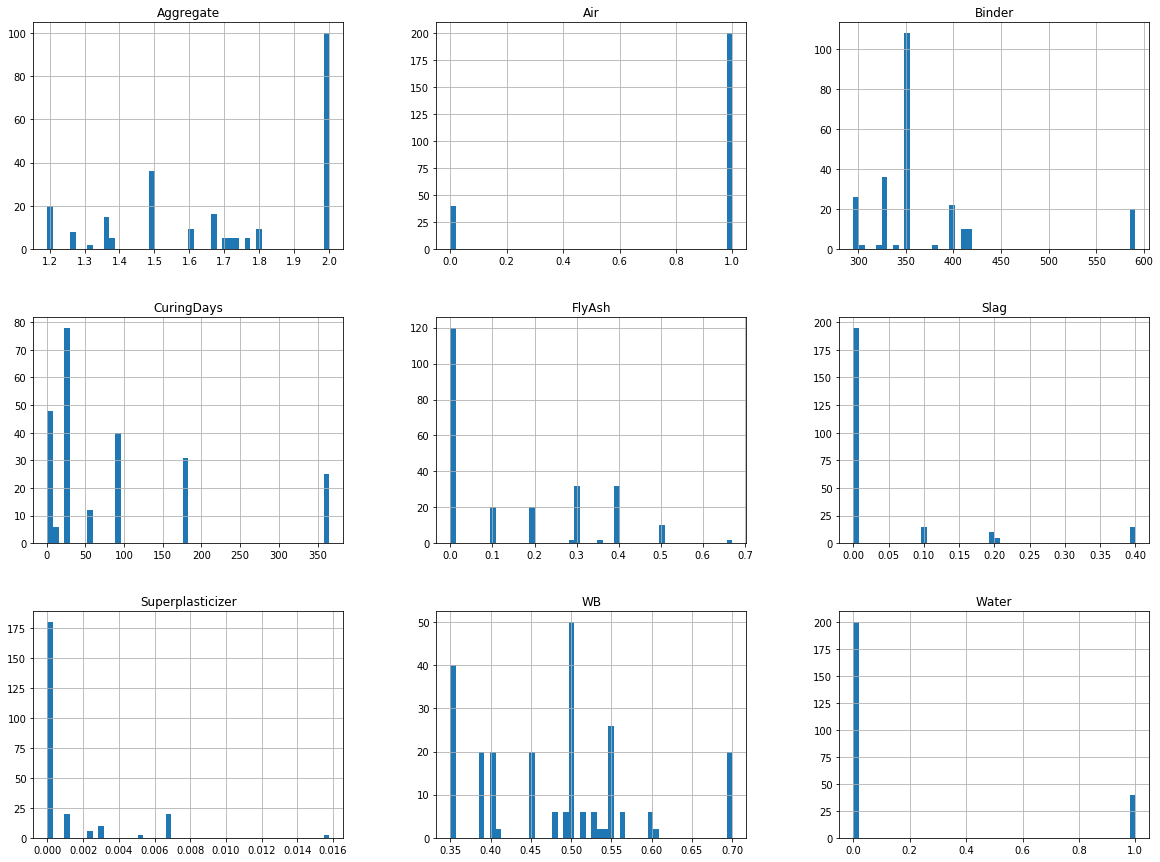

In [6]:
%matplotlib inline
X.hist(bins=50, figsize=(20,15))
plt.show()

## Split Data Set

In [7]:
myTraining = data[['Training']]
idxTrain = myTraining.index[myTraining['Training'] == True].tolist()
print(idxTrain)

[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 19, 20, 21, 22, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 47, 49, 52, 55, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 73, 74, 75, 76, 77, 78, 79, 84, 85, 87, 88, 89, 90, 92, 93, 94, 96, 98, 99, 100, 101, 102, 103, 104, 106, 107, 110, 113, 115, 116, 118, 119, 120, 122, 123, 125, 126, 127, 128, 129, 133, 134, 135, 137, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 152, 154, 155, 158, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 188, 190, 191, 192, 194, 195, 196, 199, 200, 201, 203, 204, 205, 206, 207, 209, 210, 211, 212, 214, 215, 216, 218, 219, 220, 221, 222, 223, 225, 227, 228, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239]


In [8]:
X_train = X.loc[idxTrain,:]
X_train.head()

,WB,Binder,FlyAsh,Slag,Superplasticizer,Aggregate,CuringDays,Air,Water
0,0.4,300,0.0,0.0,0.0,1.6,28,1,0
1,0.4,350,0.0,0.0,0.0,1.6,28,1,0
2,0.4,400,0.0,0.0,0.0,1.6,28,1,0
4,0.5,350,0.0,0.0,0.0,1.6,28,1,0
5,0.5,400,0.0,0.0,0.0,1.6,28,1,0


In [9]:
y_train = y.loc[idxTrain,:]
y.head()

,Porosity
0,9.58
1,11.08
2,11.27
3,10.22
4,10.30


In [10]:
idxTest = myTraining.index[myTraining['Training'] == False].tolist()
X_test = X.loc[idxTest,:]
y_test = y.loc[idxTest,:]

In [11]:
np.size(y_train)

180

In [12]:
np.size(y_test)

60

## XGBoost Regression

In [13]:
import xgboost as xgb
XGBoost = xgb.XGBRegressor(max_depth=8,n_estimators=486,learning_rate=0.14,random_state=0)
XGBoost.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.14, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=486, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [14]:
y_train_xgb = XGBoost.predict(X_train)

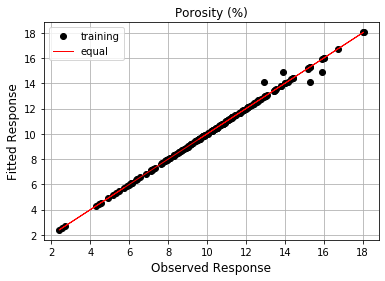

In [15]:
%matplotlib inline
plt.plot(y_train, y_train_xgb, 'ok', label='training')
plt.plot(y_train, y_train,'-r', lw=1, label='equal')
plt.legend(loc='best')
plt.title('Porosity (%)', fontsize=12)
plt.xlabel('Observed Response', fontsize=12)
plt.ylabel('Fitted Response', fontsize=12)
plt.grid(True, axis='both')

In [16]:
y_test_xgb = XGBoost.predict(X_test)

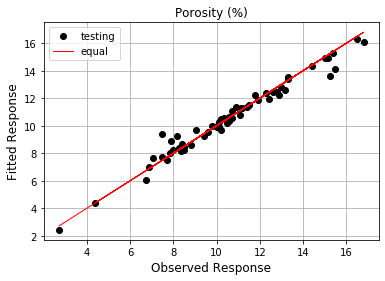

In [17]:
%matplotlib inline
plt.plot(y_test, y_test_xgb, 'ok', label='testing')
plt.plot(y_test, y_test,'-r', lw=1, label='equal')
plt.legend(loc='best')
plt.title('Porosity (%)', fontsize=12)
plt.xlabel('Observed Response', fontsize=12)
plt.ylabel('Fitted Response', fontsize=12)
plt.grid(True, axis='both')

In [18]:
from sklearn.metrics import mean_squared_error
xgb_mse = mean_squared_error(y_test, y_test_xgb)
xgb_rmse = np.sqrt(xgb_mse)
print(xgb_rmse)

0.5070676843690065


In [19]:
from sklearn.metrics import r2_score
Rsquared = r2_score(y_test, y_test_xgb)
print(Rsquared)

0.968242562522636


## Tune Hyperparameters

In [20]:
from sklearn.model_selection import RandomizedSearchCV

In [21]:
# Number of trees in Gradient Boosting
n_estimators = np.linspace(start = 10, stop = 500, num = 50, dtype=int)

# Learning rate
learning_rates = np.linspace(start = 0.01, stop = 0.5, num = 50)

# Maximum number of levels in tree
#max_depth = np.linspace(1, 20, num = 20, dtype=int)
max_depth = [int(x) for x in np.linspace(1, 20, num = 20)]
max_depth.append(None)

# Minimum number of samples required to split a node
#min_samples_split = [2, 3, 5, 10, 15, 20]

# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 3, 5, 7, 10]


# subsample may reduce variance
subsample = np.linspace(start = 0.5, stop = 1, num = 6)

# Lagrange multiplier
gamma = [0, 0.1, 0.5, 1, 2, 5]

# 
min_child_weight = [1, 2, 3, 4, 5, 6]

# Create random grid
random_param = {'n_estimators': n_estimators,
                'learning_rate': learning_rates,
                'max_depth': max_depth,
                'min_child_weight': min_child_weight
              }

In [22]:
XGBoostReg = xgb.XGBRegressor()
search = RandomizedSearchCV(XGBoostReg, random_param, n_iter = 500, cv = 10, random_state=0, verbose=2, n_jobs=-1)

In [23]:
search.fit(X_train,y_train)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100,...
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 ]),
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12,

In [24]:
search.best_params_

{'n_estimators': 310,
 'min_child_weight': 2,
 'max_depth': 3,
 'learning_rate': 0.46}

In [25]:
y_train_search = search.predict(X_train)

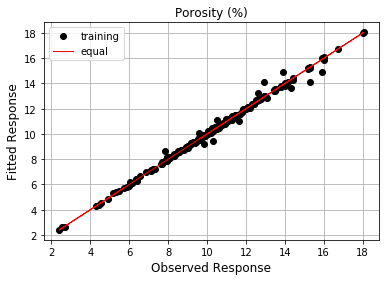

In [26]:
%matplotlib inline
plt.plot(y_train, y_train_search, 'ok', label='training')
plt.plot(y_train, y_train,'-r', lw=1, label='equal')
plt.legend(loc='best')
plt.title('Porosity (%)', fontsize=12)
plt.xlabel('Observed Response', fontsize=12)
plt.ylabel('Fitted Response', fontsize=12)
plt.grid(True, axis='both')

In [27]:
y_test_search = search.predict(X_test)

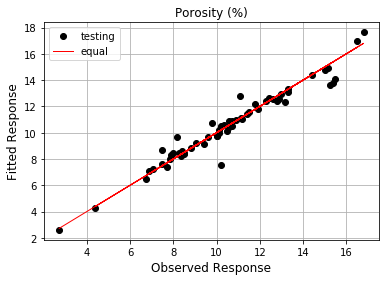

In [28]:
%matplotlib inline
plt.plot(y_test, y_test_search, 'ok', label='testing')
plt.plot(y_test, y_test,'-r', lw=1, label='equal')
plt.legend(loc='best')
plt.title('Porosity (%)', fontsize=12)
plt.xlabel('Observed Response', fontsize=12)
plt.ylabel('Fitted Response', fontsize=12)
plt.grid(True, axis='both')

In [29]:
search_mse = mean_squared_error(y_test, y_test_search)
search_rmse = np.sqrt(search_mse)
print(search_rmse)

0.6536263636265365


In [30]:
Rsquared_search = r2_score(y_test, y_test_search)
print(Rsquared_search)

0.9472317482192113


## Prediction performance

In [31]:
y_test_target = y_test.to_numpy()[:,0]
print(y_test_target[:3])

[10.22   11.07   11.1176]


In [32]:
# root-mean squared error
RMSE = np.sqrt(np.mean((y_test_target-y_test_search)**2))
print(RMSE)

0.6536263636265365


In [33]:
SSE = np.sum((y_test_target - y_test_search)**2)
SST = np.sum((y_test_target - np.mean(y_test_target))**2)
RR = 1-SSE/SST
print(RR)

0.9472317482192113


In [34]:
# mean absolute percentage error (%)
MAPE = np.mean(np.abs((y_test_target-y_test_search)/y_test_target))*100
print(MAPE)

3.751813839543488


In [35]:
# create table
performance_test = [RR, RMSE, MAPE]
df_test = pd.DataFrame(performance_test, index=['Rsquared','RMSE','MAPE(%)'], columns=['performance'])
print(df_test)

          performance
Rsquared     0.947232
RMSE         0.653626
MAPE(%)      3.751814
